In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from PIL import Image
import matplotlib.gridspec as gridspec
import os
import cv2

In [25]:
os.chdir("/home/kalamix/Desktop/Dataset4Heatmap/")

In [39]:
colors = sns.color_palette("YlGn", 25) + sns.color_palette("Reds", 50)
gcol2 = colors

In [40]:
# ---------- Helper function for heatmap ----------
def plot_heatmap(data, title, scale_data=True, cmap=colors):
    if scale_data:
        data = StandardScaler().fit_transform(data.T).T  # scale per gene
    # hierarchical clustering (ward.D equivalent = ward in scipy)
    linkage_method = linkage(data, method='ward')
    
    g = sns.clustermap(
        data,
        method="ward",
        cmap=cmap,
        xticklabels=False,
        yticklabels=False,
        figsize=(5,5),
        cbar_pos=None
    )
    plt.title(title)
    return g

In [41]:
# ---------- Example: Noisy dataset ----------
genes = [f"Gene_{i}" for i in range(1,2001)]
cells = [f"Cell_{i}" for i in range(1,3001)]

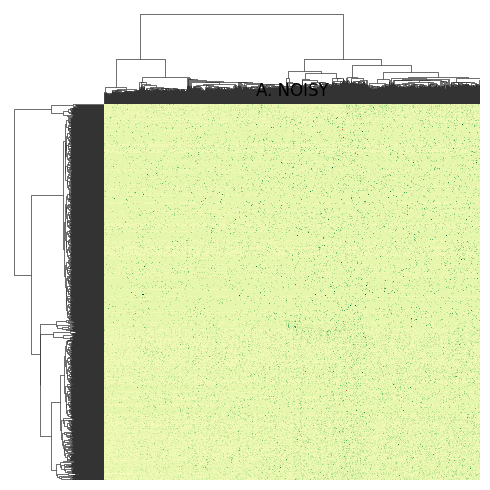

In [42]:
# Load your matrix (replace with your paths)
noisy = pd.read_csv("Noisy_UMI_3000.csv")
noisy.index = genes
noisy.columns = cells

# Plot noisy
plot_heatmap(noisy, title="A. NOISY")
plt.savefig("noisy.png")
plt.show()

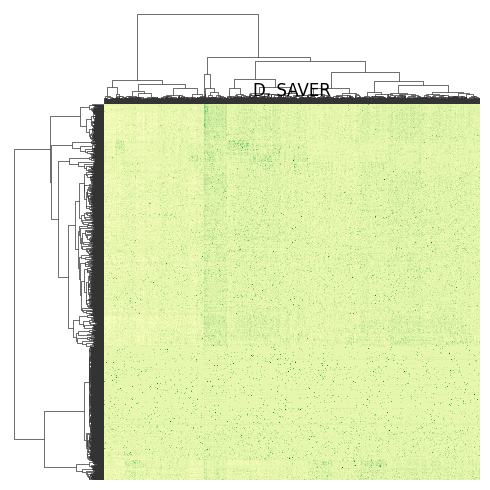

In [43]:
# ---------- Example: SAVER ----------
saver = pd.read_csv("denoised_saver.csv")
saver.index = genes
saver.columns = cells

plot_heatmap(saver, title="D. SAVER")
plt.savefig("saver.png")
plt.show()

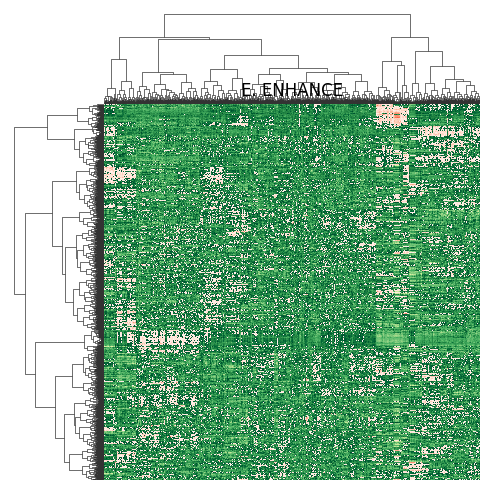

In [44]:
# ---------- Example: ENHANCE ----------
enhance = pd.read_csv("denoised_enhance.tsv", sep="\t")
enhance = enhance.iloc[:,1:]   # drop first column if it's index
enhance.index = genes
enhance.columns = cells

plot_heatmap(enhance, title="E. ENHANCE")
plt.savefig("enhance.png")
plt.show()

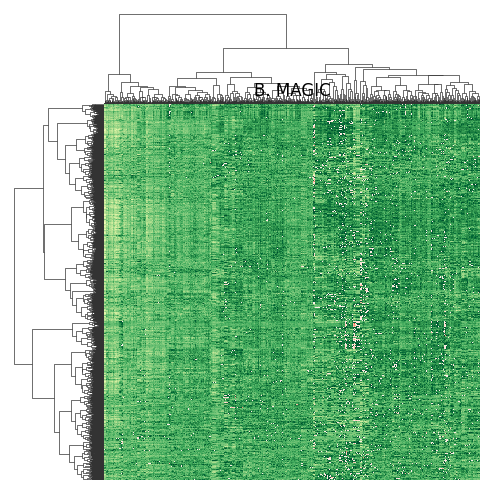

In [45]:
# ---------- Example: MAGIC ----------
magic = pd.read_csv("denoised_magic.csv")
magic = magic.iloc[:,1:]       # drop index col
magic = magic.T
magic.index = genes
magic.columns = cells

plot_heatmap(magic, title="B. MAGIC")
plt.savefig("magic.png")
plt.show()


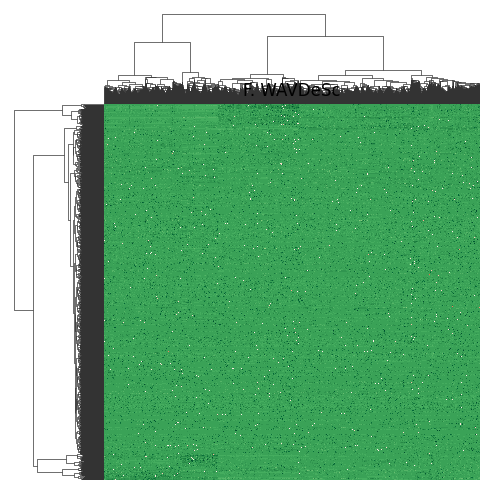

In [46]:
# ---------- Example: WAVDeSc ----------
wavdesc = pd.read_csv("denoised_wavdesc_bior2.6D.csv", header=None)
wavdesc.index = genes
wavdesc.columns = cells

plot_heatmap(wavdesc, title="F. WAVDeSc")
plt.savefig("wavdesc.png")
plt.show()

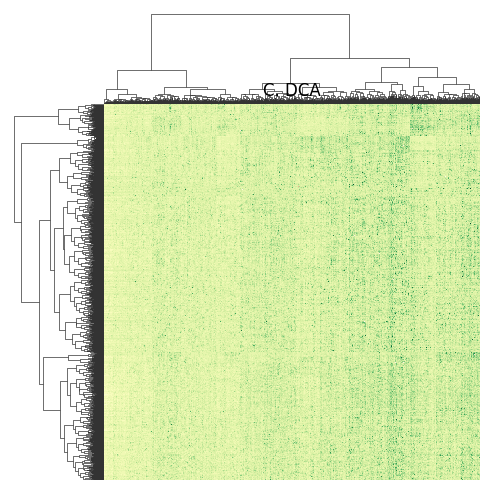

In [47]:
# ---------- Example: DCA ----------
dca = pd.read_csv("denoised_DCA.tsv", sep="\t", index_col=0)
dca.index = genes
dca.columns = cells

plot_heatmap(dca, title="C. DCA")
plt.savefig("dca.png")
plt.show()

In [38]:
# --- Combine Heatmaps into a Grid ---
# Load heatmap images
dca_img = cv2.imread("dca.png")
noisy_img = cv2.imread("noisy.png")
saver_img = cv2.imread("saver.png")
magic_img = cv2.imread("magic.png")
enhance_img = cv2.imread("enhance.png")
wavdesc_img = cv2.imread("wavdesc.png")

# Create a 2x3 grid for displaying images
fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 1], height_ratios=[1, 1])

# Plot images in the grid
ax1 = fig.add_subplot(gs[0, 0])
ax1.imshow(dca_img)
ax1.set_title("Truth")
ax1.axis("off")

ax2 = fig.add_subplot(gs[0, 1])
ax2.imshow(noisy_img)
ax2.set_title("Noisy")
ax2.axis("off")

ax3 = fig.add_subplot(gs[0, 2])
ax3.imshow(saver_img)
ax3.set_title("SAVER")
ax3.axis("off")

ax4 = fig.add_subplot(gs[1, 0])
ax4.imshow(enhance_img)
ax4.set_title("ENHANCE")
ax4.axis("off")

ax5 = fig.add_subplot(gs[1, 1])
ax5.imshow(magic_img)
ax5.set_title("MAGIC")
ax5.axis("off")

ax6 = fig.add_subplot(gs[1, 2])
ax6.imshow(wavdesc_img)
ax6.set_title("WAVDeSc")
ax6.axis("off")

plt.tight_layout()
plt.savefig("combined_heatmaps.png")
plt.close()

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))

datasets = {
    "A. NOISY": noisy,
    "B. MAGIC": magic,
    "C. DCA": dca,
    "D. SAVER": saver,
    "E. ENHANCE": enhance,
    "F. WAVDeSc": wavdesc
}

for ax, (title, data) in zip(axes.flat, datasets.items()):
    scaled = StandardScaler().fit_transform(data.T).T
    sns.heatmap(scaled, cmap="RdYlGn", xticklabels=False, yticklabels=False, ax=ax)
    ax.set_title(title, fontsize=12)

plt.tight_layout()
plt.show()
